**Bayesian stats notes**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon


sns.set_context("talk")  # visual theme

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

# Different beta distributions

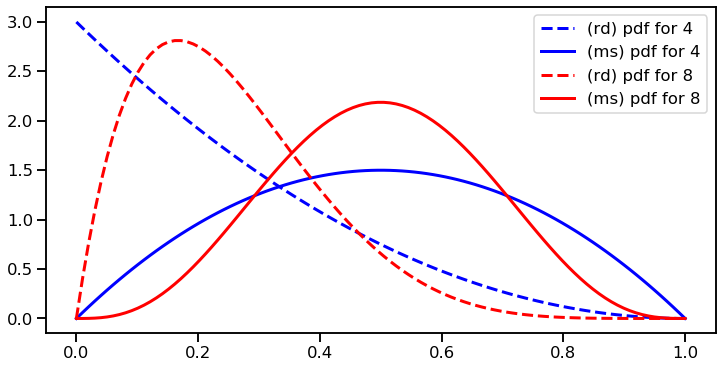

<IPython.core.display.Javascript object>

In [71]:
f, ax1 = plt.subplots(figsize=(12, 6))
color_list = ["blue", "red", "green", "orange", "black"]
# for i, total_ab in enumerate([4, 5, 6, 7, 8]):
for i, total_ab in enumerate([4, 8]):
    a_rd, b_rd = round(0.25 * total_ab), round(0.75 * total_ab)
    # print(a_rd, b_rd)
    x = np.linspace(beta.ppf(0.00, a_rd, b_rd), beta.ppf(1.00, a_rd, b_rd), 100)
    this_label = "(rd) pdf for " + str(total_ab)
    ax1.plot(
        x,
        beta.pdf(x, a_rd, b_rd),
        lw=3,
        linestyle="dashed",
        color=color_list[i],
        label=this_label,
    )

    a_ms, b_ms = round(0.5 * total_ab), round(0.5 * total_ab)
    # print(a_ms, b_ms)
    x = np.linspace(beta.ppf(0.00, a_rd, b_rd), beta.ppf(1.00, a_rd, b_rd), 100)
    this_label = "(ms) pdf for " + str(total_ab)
    ax1.plot(x, beta.pdf(x, a_ms, b_ms), lw=3, color=color_list[i], label=this_label)


ax1.legend()

# Evaluating multiple choice problem

In [14]:
# c that is very low 0
for n in [4, 5, 6, 7, 8]:
    c = 0
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 0 posterior odds ratio: 50.6
n: 5 c: 0 posterior odds ratio: 134.8
n: 6 c: 0 posterior odds ratio: 359.6
n: 7 c: 0 posterior odds ratio: 958.9
n: 8 c: 0 posterior odds ratio: 2557.1


<IPython.core.display.Javascript object>

In [10]:
# c that is very low 0.1
for n in [4, 5, 6, 7, 8]:
    c = 0.1
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 0.1 posterior odds ratio: 49.1
n: 5 c: 0.1 posterior odds ratio: 131.0
n: 6 c: 0.1 posterior odds ratio: 349.4
n: 7 c: 0.1 posterior odds ratio: 931.7
n: 8 c: 0.1 posterior odds ratio: 2484.6


<IPython.core.display.Javascript object>

In [11]:
# c that is for a non-mastery student
for n in [4, 5, 6, 7, 8]:
    c = 0.25 * n
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 1.0 posterior odds ratio: 37.9
n: 5 c: 1.25 posterior odds ratio: 94.1
n: 6 c: 1.5 posterior odds ratio: 233.6
n: 7 c: 1.75 posterior odds ratio: 579.6
n: 8 c: 2.0 posterior odds ratio: 1438.4


<IPython.core.display.Javascript object>

In [12]:
# c for a mastery student
for n in [4, 5, 6, 7, 8]:
    c = 0.5 * n
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 2.0 posterior odds ratio: 28.4
n: 5 c: 2.5 posterior odds ratio: 65.7
n: 6 c: 3.0 posterior odds ratio: 151.7
n: 7 c: 3.5 posterior odds ratio: 350.3
n: 8 c: 4.0 posterior odds ratio: 809.1


<IPython.core.display.Javascript object>

In [13]:
# c = all correct
for n in [4, 5, 6, 7, 8]:
    c = n
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 4 posterior odds ratio: 16.0
n: 5 c: 5 posterior odds ratio: 32.0
n: 6 c: 6 posterior odds ratio: 64.0
n: 7 c: 7 posterior odds ratio: 128.0
n: 8 c: 8 posterior odds ratio: 256.0


<IPython.core.display.Javascript object>

By this reasoning, I would choose 5 because it is the only one with a posterior odds ratio that is greater than or equal to 19 in all values of c.

## Binomial distribution

### Probability mass function

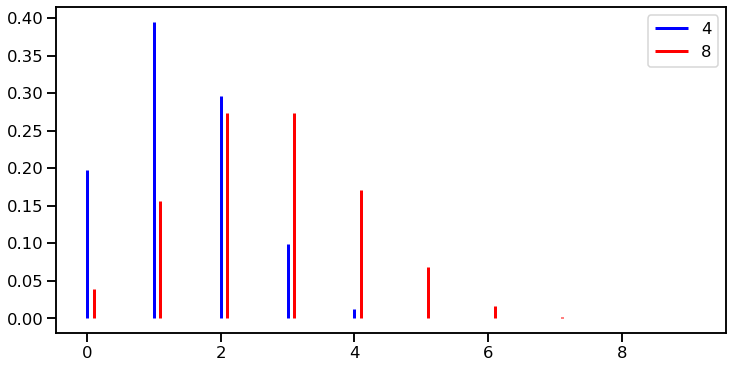

<IPython.core.display.Javascript object>

In [48]:
f, ax1 = plt.subplots(figsize=(12, 6))
color_list = ["blue", "red", "green", "orange", "black"]
# for i, n in enumerate([4, 5, 6, 7, 8]):
for i, n in enumerate([4, 8]):
    rv = binom(n, (1 / 3))
    x = np.arange(0, 10)
    # ax1.plot(x, rv.pmf(x), lw=1, color=color_list[i], label=str(n))
    ax1.vlines(x + i / 10, 0, rv.pmf(x), lw=3, color=color_list[i], label=str(n))
ax1.legend()

Where is the left bound where the cumulative distribution is 5%?

In [51]:
rv.cdf(x)

array([0.03901844, 0.19509221, 0.46822131, 0.7413504 , 0.91205609,
       0.98033836, 0.99740893, 0.99984758, 1.        , 1.        ])

<IPython.core.display.Javascript object>

In [52]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>

## Probability mass function with different probabilities

In [ ]:
f, ax1 = plt.subplots(figsize=(12, 6))
color_list = ["blue", "red", "green", "orange", "black"]
# for i, n in enumerate([4, 5, 6, 7, 8]):
for i, n in enumerate([4, 8]):
    rv = binom(n, (1 / 3))
    x = np.arange(0, 10)
    # ax1.plot(x, rv.pmf(x), lw=1, color=color_list[i], label=str(n))
    ax1.vlines(x + i / 10, 0, rv.pmf(x), lw=3, color=color_list[i], label=str(n))
ax1.legend()

Text(0.5, 1.0, 'Probability distribution after n plate appearances')

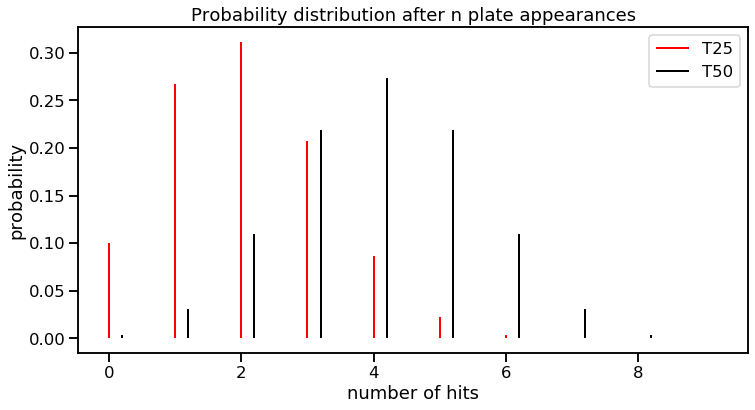

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# T25 group
n25, p25 = 8, 0.25
rv25 = binom(n25, p25)
x = np.arange(0, 10)
ax.vlines(x, 0, rv25.pmf(x25), colors="r", linestyles="-", lw=2, label="T25")


# T50 group
n50, p50 = 8, 0.50
rv50 = binom(n50, p50)
x = np.arange(0, 10)
ax.vlines(x + 0.2, 0, rv50.pmf(x), colors="k", linestyles="-", lw=2, label="T50")

# Formatting
ax.legend()
ax.set_ylabel("probability")
ax.set_xlabel("number of hits")
ax.set_title("Probability distribution after n plate appearances")


# Poisson and exponential distribution

## Poisson

- Wikipedia [article](https://en.wikipedia.org/wiki/Poisson_distribution)
- Used for count data, particularly rare events.
- It approaches normal as the lambda term (rate) goes up (the more frequent it is, the more it approaches normal).
- Scipy stats [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) (the lambda term is represented by mu).

Assumptions (similar to binomial):
- k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ....
- The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
- The average rate at which events occur is independent of any occurrences. For simplicity, this is usually assumed to be constant, but may in practice vary with time.
- Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.

Examples:
- The number of earthquakes that occur in a given time.
- The number of chocolate chips in a cookie (?)

Equations: 

$ X \sim Poiss(\lambda)$

$ P(X=x|\lambda) = \frac{\lambda^x \exp(-\lambda)}{x!}$

$ E[X] = \lambda $

$ Var[X] = \lambda $


Text(0.5, 1.0, 'Poisson distribution, lambda=0.6')

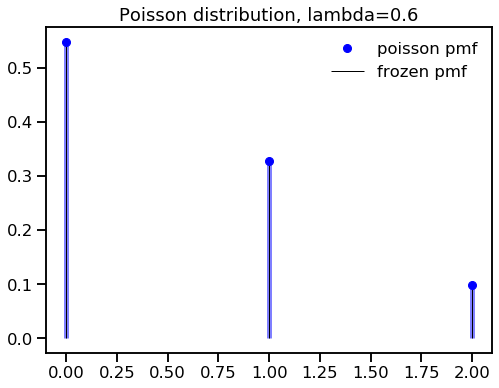

<IPython.core.display.Javascript object>

In [12]:
# In scipy, the lambda term is represented by mu

mu = 0.6
rv = poisson(mu)

f, ax1 = plt.subplots(figsize=(8,6))
rv = poisson(mu)
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

ax1.plot(x, poisson.pmf(x, mu), "bo", ms=8, label="poisson pmf")
ax1.vlines(x, 0, poisson.pmf(x, mu), colors="b", lw=5, alpha=0.5)

ax1.vlines(x, 0, rv.pmf(x), colors="k", linestyles="-", lw=1, label="frozen pmf")
ax1.legend(loc="best", frameon=False)

ax1.set_title("Poisson distribution, lambda=0.6")

### Example problem

Example: Significant earthquakes occur in the Western United States approximately following a Poisson process with rate of two earthquakes per week. **What is the probability there will be at least 3 earthquakes in the next two weeks?**

We have two options for rate in terms of duration. We can use what is given (2 earthquakes/week) or frame it in terms of the time frame we are looking at (in two weeks, we expect 4 earthquakes) and therefore use (4 earthquakes/2 weeks).

In [9]:
rate_a = 2  # 2 earthquakes per week
rate_b = 4  # 4 earthquakes per two weeks

<IPython.core.display.Javascript object>

Let's use `rate_b`.

Text(0.5, 1.0, 'Poisson distribution, lambda=4')

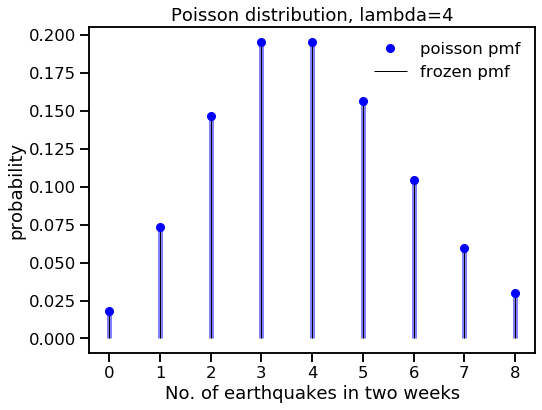

<IPython.core.display.Javascript object>

In [13]:
mu = rate_b
rv = poisson(mu)

f, ax1 = plt.subplots(figsize=(8,6))
rv = poisson(mu)
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

ax1.plot(x, poisson.pmf(x, mu), "bo", ms=8, label="poisson pmf")
ax1.vlines(x, 0, poisson.pmf(x, mu), colors="b", lw=5, alpha=0.5)

ax1.vlines(x, 0, rv.pmf(x), colors="k", linestyles="-", lw=1, label="frozen pmf")
ax1.legend(loc="best", frameon=False)

ax1.set_xlabel("No. of earthquakes in two weeks")
ax1.set_ylabel("probability")
ax1.set_title("Poisson distribution, lambda=" + str(rate_b))

We can see that we can sum the probabilities when x is 3 or higher. Alternatively, we can look at 1 minus the probability of being less than 3. We can use the scipy.stats CDF function.

In [19]:
print("Probability of 3 or more earthquakes: {0:0.4f}".format(1 - rv.cdf(2)))

Probability of 3 or more earthquakes: 0.7619


<IPython.core.display.Javascript object>

Therefore, there is a 76.2% chance that 3 or more earthquakes can happen.

## Exponential

- Models the waiting time between random events.
- Values are continuous
- Scipy.stats [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html). Note that in scipy.stats, the lambda term is represented in `scale`, scale = 1/lambda.
- Wikipedia [article](https://en.wikipedia.org/wiki/Exponential_distribution).

Assumptions (similar to binomial):
- k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ....
- The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
- The average rate at which events occur is independent of any occurrences. For simplicity, this is usually assumed to be constant, but may in practice vary with time.
- Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.

Examples:
- The waiting time between earthquakes.


Equations: 

$ X \sim \exp(\lambda)$

$ f(X=x|\lambda) = \lambda e^{-\lambda x} $ for positive values of x

$ E[X] = \frac{1}{\lambda} $

$ Var[X] = \frac{1}{\lambda^2} $

### Example problem

Using the same example problem as above, **What is the probability that the next earthquake will be at least 2 weeks away?**

Given that 2 earthquakes are happening within per week, we would expect that it would be a pretty small probability that the next earthquake won't happen for at least 2 weeks.

In [21]:
scale = 1 / mu
expon.pdf(x, scale)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.96219086, 0.91855105, 0.8768905 , 0.83711945,
       0.79915221, 0.76290695, 0.72830558, 0.69527355, 0.66373967,
       0.633636  , 0.60489767, 0.57746276, 0.55127215, 0.5262694 ,
       0.50240065, 0.47961445, 0.45786171, 0.43709556, 0.41727125,
       0.39834607, 0.38027923, 0.3630318 , 0.34656663, 0.33084822,
       0.31584272, 0.30151779, 0.28784256, 0.27478757, 0.26232468,
       0.25042704, 0.23906901, 0.22822613, 0.21787501, 0.20799337,
       0.19855991, 0.1895543 , 0.18095713, 0.17274989, 0.16491488,
       0.15743522, 0.15029481, 0.14347824, 0.13697084, 0.13075858,
       0.12482807, 0.11916654, 0.11376178, 0.10860216, 0.10367655,
       0.09897434, 0.09448539, 0.09020004, 0.08610905, 0.08220361,
       0.07847529, 0.07491607, 0.07151828, 0.0682746 , 0.06517803,
       0.0622219 , 0.05939985, 0.05670579, 0.05413392, 0.0516787 ,
       0.04933483, 0.04709727, 0.04496119, 0.04292199, 0.04097

<IPython.core.display.Javascript object>

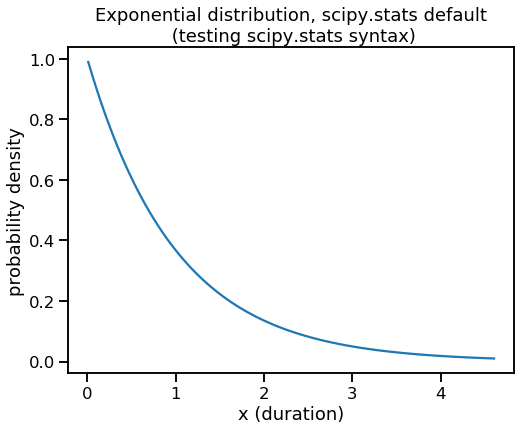

<IPython.core.display.Javascript object>

In [59]:
f, ax1 = plt.subplots(figsize=(8, 6))
mu = 0.5
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)

rv = expon()
ax1.plot(x, rv.pdf(x), ms=8, label="exponential pdf")

ax1.set_xlabel("x (duration)")
ax1.set_ylabel("probability density")
ax1.set_title(
    "Exponential distribution, scipy.stats default\n (testing scipy.stats syntax)"
)

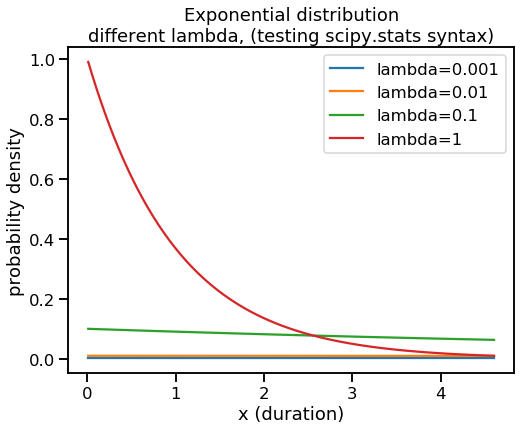

<IPython.core.display.Javascript object>

In [74]:
f, ax1 = plt.subplots(figsize=(8, 6))
mu_list = [0.001, 0.01, 0.1, 1]
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)

for mu in mu_list:
    ax1.plot(x, expon.pdf(x, loc=0, scale=1 / mu), ms=8, label="lambda=" + str(mu))

ax1.set_xlabel("x (duration)")
ax1.set_ylabel("probability density")
ax1.set_title(
    "Exponential distribution\ndifferent lambda, (testing scipy.stats syntax)"
)
ax1.legend()

### Using rate of number of earthquakes per week

I think it's more intuitive to change the rate units and do earthquakes per week instead of earthquakes per 2 weeks. Let's use `rate_a` as our lambda level.

In [54]:
print("No. of earthquakes per week: ", rate_a)

No. of earthquakes per week:  2


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Exponential distribution, lambda = 2 earthquakes per week')

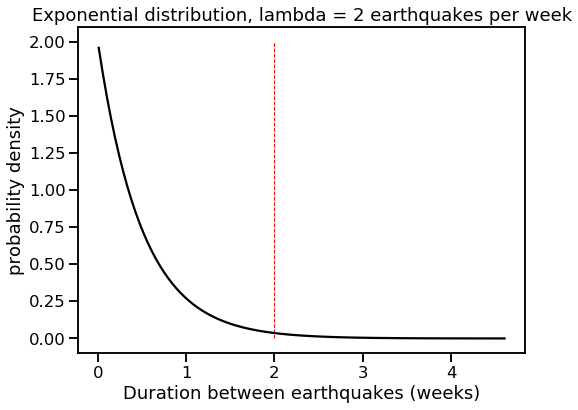

<IPython.core.display.Javascript object>

In [66]:
f, ax1 = plt.subplots(figsize=(8, 6))
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)

ax1.plot(
    x, expon.pdf(x, loc=0, scale=1 / rate_a), ms=8, color="k", label="lambda = 0.5"
)
ax1.vlines(2, 0, 2, colors="r", linestyles="dashed", lw=1)


ax1.set_xlabel("Duration between earthquakes (weeks)")
ax1.set_ylabel("probability density")
ax1.set_title("Exponential distribution, lambda = 2 earthquakes per week")

Since we're looking to see what the probability is for the next earthquake not happening for at least 2 weeks, we want to look at everything to the right of the dashed line. We can look at 1 minus the probability of being less than 2 weeks and use the scipy.stats CDF function.

In [69]:
print(
    "Probability of next earthquake being at least 2 weeks away: {0:0.4f}".format(
        1 - expon.cdf(2)
    )
)

Probability of next earthquake being at least 2 weeks away: 0.1353


<IPython.core.display.Javascript object>

As expected, we see a small probability of the next earthquake being more than 2 weeks away, given that two earthquakes have been happening per week.

### Weird obsevation about syntax

Note that syntax is weird and initializing a model with `rv=expon()` convention does not allow you to set arguments.

TypeError: pdf() got an unexpected keyword argument 'loc'

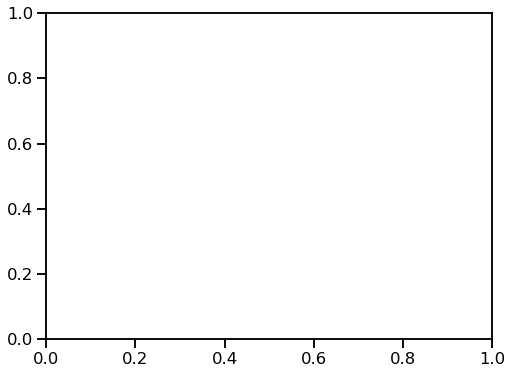

<IPython.core.display.Javascript object>

In [47]:
f, ax1 = plt.subplots(figsize=(8, 6))

mu = 0.5
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)

# Can't initalize like this
rv = expon()
ax1.plot(x, rv.pdf(x, loc=0, scale=1 / mu), "bo", ms=8, label="exponential pdf")
# ax1.plot(x, expon.pdf(x, 1 / 0.5), "r-", lw=5, alpha=0.6, label="expon pdf")
# ax1.vlines(x, 0, poisson.pmf(x, mu), colors="b", lw=5, alpha=0.5)

ax1.set_xlabel("Duration between earthquakes")
ax1.set_ylabel("probability density")
ax1.set_title("Exponential distribution, lambda=" + str(rate_b))